In [167]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from pyalex import Works, Authors, Sources, Institutions, Concepts, Publishers

In [168]:
import pandas as pd
import requests

def retrieve_all_results(url):
    results = []
    next_cursor = '*'

    while next_cursor:
        # Make the API request with the current cursor value
        response = requests.get(url + f'&cursor={next_cursor}')
        data = response.json()

        # Process the current page of results
        current_results = data['results']
        results.extend(current_results)

        # Update the next_cursor value for the next API request
        next_cursor = data['meta']['next_cursor']

    return results

# Example usage
api_url = 'https://api.openalex.org/works?filter=locations.source.issn:2641-3337&per-page=100'
all_results = retrieve_all_results(api_url)

# Convert JSON data to DataFrame
df = pd.DataFrame(all_results)



In [169]:
# Give a quick overview about what this dataframe contains
df.head()


,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,...,grants,referenced_works_count,referenced_works,related_works,ngrams_url,abstract_inverted_index,cited_by_api_url,counts_by_year,updated_date,created_date
0,https://openalex.org/W3001554335,https://doi.org/10.1162/qss_a_00019,"Scopus as a curated, high-quality bibliometric...","Scopus as a curated, high-quality bibliometric...",2020,2020-02-01,{'openalex': 'https://openalex.org/W3001554335...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",journal-article,...,[],25.0,"[https://openalex.org/W1904486621, https://ope...","[https://openalex.org/W1965294778, https://ope...",https://api.openalex.org/works/W3001554335/ngrams,"{'Scopus': [0, 68, 91, 116, 144, 198], 'is': [...",https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2023, 'cited_by_count': 74}, {'year'...",2023-06-15T21:44:02.432758,2020-01-30
1,https://openalex.org/W3000895385,https://doi.org/10.1162/qss_a_00018,Web of Science as a data source for research o...,Web of Science as a data source for research o...,2020,2020-02-01,{'openalex': 'https://openalex.org/W3000895385...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",journal-article,...,[],24.0,"[https://openalex.org/W1593308704, https://ope...","[https://openalex.org/W2041004369, https://ope...",https://api.openalex.org/works/W3000895385/ngrams,"{'Web': [0], 'of': [1, 14, 40, 54, 73, 80, 94,...",https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2023, 'cited_by_count': 53}, {'year'...",2023-06-21T15:38:46.166985,2020-01-30
2,https://openalex.org/W3002924435,https://doi.org/10.1162/qss_a_00021,Microsoft Academic Graph: When experts are not...,Microsoft Academic Graph: When experts are not...,2020,2020-02-01,{'openalex': 'https://openalex.org/W3002924435...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",journal-article,...,[],31.0,"[https://openalex.org/W1547304362, https://ope...","[https://openalex.org/W1998361818, https://ope...",https://api.openalex.org/works/W3002924435/ngrams,"{'An': [0], 'ongoing': [1], 'project': [2], 'e...",https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2023, 'cited_by_count': 21}, {'year'...",2023-06-20T04:26:24.548987,2020-01-30
3,https://openalex.org/W3123554164,https://doi.org/10.1162/qss_a_00112,Large-scale comparison of bibliographic data s...,Large-scale comparison of bibliographic data s...,2021,2021-01-01,{'openalex': 'https://openalex.org/W3123554164...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",journal-article,...,[],26.0,"[https://openalex.org/W1767272795, https://ope...","[https://openalex.org/W1890493318, https://ope...",https://api.openalex.org/works/W3123554164/ngrams,"{'Abstract': [0], 'We': [1, 49, 77, 104], 'pre...",https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2023, 'cited_by_count': 37}, {'year'...",2023-06-16T04:23:20.601998,2021-02-01
4,https://openalex.org/W3034917217,https://doi.org/10.1162/qss_a_00076,Pandemic publishing: Medical journals strongly...,Pandemic publishing: Medical journals strongly...,2020,2020-08-01,{'openalex': 'https://openalex.org/W3034917217...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",journal-article,...,[],15.0,"[https://openalex.org/W1968878949, https://ope...","[https://openalex.org/W2748952813, https://ope...",https://api.openalex.org/works/W3034917217/ngrams,"{'In': [0], 'times': [1], 'of': [2, 12, 17, 22...",https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2023, 'cited_by_count': 7}, {'year':...",2023-06-16T04:36:39.474513,2020-06-19


In [170]:
# get first insights. Not really useful so far.
df.describe(include='all')

,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,...,grants,referenced_works_count,referenced_works,related_works,ngrams_url,abstract_inverted_index,cited_by_api_url,counts_by_year,updated_date,created_date
count,195,195,195,195,195.000000,195,195,194,195,195,...,195,184.000000,195,195,195,184,195,195,195,195
unique,184,184,184,184,NaN,43,184,2,195,1,...,44,NaN,143,184,184,174,184,96,190,75
top,https://openalex.org/W4200005075,https://doi.org/10.1162/qss_a_00173,Researching women and men 1996–2020: Is androc...,Researching women and men 1996–2020: Is androc...,NaN,2021-01-01,{'openalex': 'https://openalex.org/W4200005075...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",journal-article,...,[],NaN,[],"[https://openalex.org/W1503254064, https://ope...",https://api.openalex.org/works/W4200005075/ngrams,"{'Abstract': [0], 'The': [1, 93, 134], 'aim': ...",https://api.openalex.org/works?filter=cites:W4...,[],2023-05-30T18:34:42.912708,2023-01-06
freq,2,2,2,2,NaN,40,2,193,1,195,...,150,NaN,43,2,2,2,2,52,2,10
mean,NaN,NaN,NaN,NaN,2021.015385,NaN,NaN,NaN,NaN,NaN,...,NaN,29.304348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.199127,NaN,NaN,NaN,NaN,NaN,...,NaN,24.620059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,5.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,28.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2022.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,43.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
# how many works were references by the articles of this journal?
df['referenced_works_count'].describe()

count    184.000000
mean      29.304348
std       24.620059
min        0.000000
25%        5.750000
50%       28.500000
75%       43.250000
max      112.000000
Name: referenced_works_count, dtype: float64

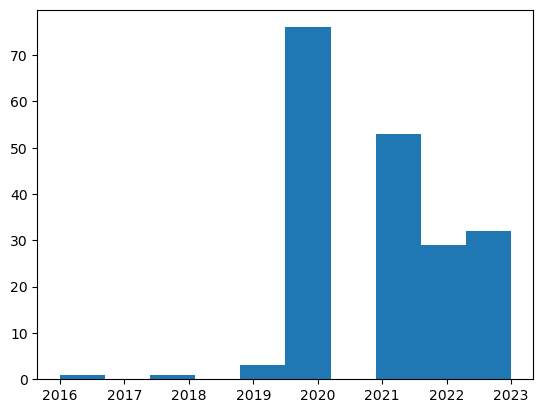

In [172]:
# Make a histogram of the publications per year
pubyear = df['publication_year']
plt.hist(pubyear)
plt.show()

In [173]:
# write data to csv
df.to_csv("openalex_df", index=False)

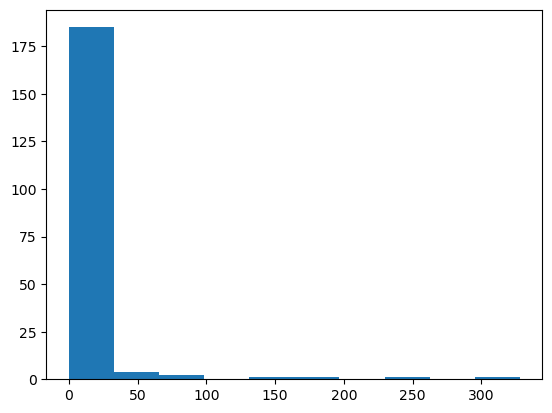

In [174]:
df['cited_by_count'].describe()


# Make a histogram of the publications per year
citecount = df['cited_by_count']
plt.hist(citecount)
plt.show()